In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


df = pd.read_csv("premier_league.csv")
print(df.head())
print(df.info())
print(df.describe())




df = df.drop(columns=['links'])

    

print(df.info())
print(df.head())
print(df.columns.tolist())

            date   clock                  stadium attendance       Home Team  \
0  28th May 2023  4:30pm         Emirates Stadium     60,095         Arsenal   
1  28th May 2023  4:30pm               Villa Park     42,212     Aston Villa   
2  28th May 2023  4:30pm  Gtech Community Stadium     17,120       Brentford   
3  28th May 2023  4:30pm          Stamford Bridge     40,130         Chelsea   
4  28th May 2023  4:30pm            Selhurst Park     25,198  Crystal Palace   

   Goals Home                 Away Team  Away Goals  home_possessions  \
0           5   Wolverhampton Wanderers           0              51.0   
1           2  Brighton and Hove Albion           1              40.3   
2           1           Manchester City           0              34.4   
3           1          Newcastle United           1              64.4   
4           1         Nottingham Forest           1              66.0   

   away_possessions  ...  away_duels  home_saves  away_saves  home_fouls  \
0   

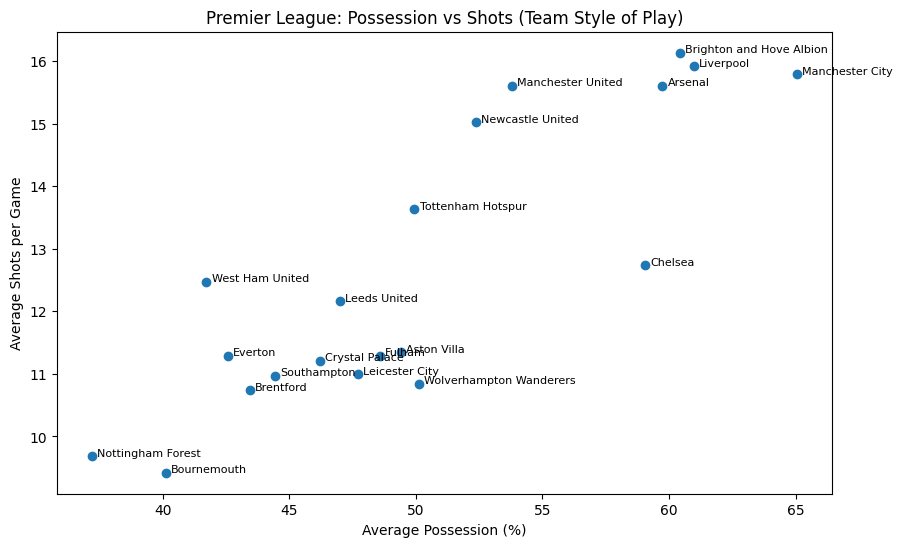

In [6]:
# Aggregate home stats
home_stats = df.groupby("Home Team").agg({
    "home_possessions": "mean",
    "home_pass": "mean",
    "home_shots": "mean",
    "home_on": "mean",
    "home_tackles": "mean",
    "home_fouls": "mean",
    "home_duels": "mean",
    "Goals Home": "mean"
}).reset_index()

home_stats.rename(columns={
    "Home Team": "Team",
    "home_possessions": "Possession",
    "home_pass": "Passing Accuracy",
    "home_shots": "Shots",
    "home_on": "Shots on Target",
    "home_tackles": "Tackles Won",
    "home_fouls": "Fouls",
    "home_duels": "Aerial Duels",
    "Goals Home": "Goals"
}, inplace=True)

# Aggregate away stats
away_stats = df.groupby("Away Team").agg({
    "away_possessions": "mean",
    "away_pass": "mean",
    "away_shots": "mean",
    "away_on": "mean",
    "away_tackles": "mean",
    "away_fouls": "mean",
    "away_duels": "mean",
    "Away Goals": "mean"
}).reset_index()

away_stats.rename(columns={
    "Away Team": "Team",
    "away_possessions": "Possession",
    "away_pass": "Passing Accuracy",
    "away_shots": "Shots",
    "away_on": "Shots on Target",
    "away_tackles": "Tackles Won",
    "away_fouls": "Fouls",
    "away_duels": "Aerial Duels",
    "Away Goals": "Goals"
}, inplace=True)

# Merge home + away
team_stats = pd.concat([home_stats, away_stats])
team_stats = team_stats.groupby("Team").mean().reset_index()

# Scatter plot Possession vs Shots
plt.figure(figsize=(10,6))
plt.scatter(team_stats["Possession"], team_stats["Shots"])

for i, team in enumerate(team_stats["Team"]):
    plt.text(team_stats["Possession"][i]+0.2, team_stats["Shots"][i], team, fontsize=8)

plt.xlabel("Average Possession (%)")
plt.ylabel("Average Shots per Game")
plt.title("Premier League: Possession vs Shots (Team Style of Play)")
plt.show()


In [10]:
# 🔹 Top 10 teams by Possession
print("🏆 Top 10 Teams by Possession:")
print(team_stats.sort_values("Possession", ascending=False)[["Team", "Possession"]].head(10))
print("\n")

# 🔹 Top 10 teams by Shots
print("🔫 Top 10 Teams by Shots:")
print(team_stats.sort_values("Shots", ascending=False)[["Team", "Shots"]].head(10))
print("\n")

# 🔹 Top 10 teams by Passing Accuracy
print("🎯 Top 10 Teams by Passing Accuracy:")
print(team_stats.sort_values("Passing Accuracy", ascending=False)[["Team", "Passing Accuracy"]].head(10))
print("\n")

# 🔹 Top 10 teams by Tackles Won %
print("🛡️ Top 10 Teams by Tackles Won %:")
print(team_stats.sort_values("Tackles Won", ascending=False)[["Team", "Tackles Won"]].head(10))
print("\n")

# 🔹 Top 10 teams by Aerial Duels %
print("✈️ Top 10 Teams by Aerial Duels %:")
print(team_stats.sort_values("Aerial Duels", ascending=False)[["Team", "Aerial Duels"]].head(10))


🏆 Top 10 Teams by Possession:
                        Team  Possession
12           Manchester City   65.044737
11                 Liverpool   60.986842
4   Brighton and Hove Albion   60.447368
0                    Arsenal   59.736842
5                    Chelsea   59.055263
13         Manchester United   53.802632
14          Newcastle United   52.389474
19   Wolverhampton Wanderers   50.110526
17         Tottenham Hotspur   49.947368
1                Aston Villa   49.415789


🔫 Top 10 Teams by Shots:
                        Team      Shots
4   Brighton and Hove Albion  16.131579
11                 Liverpool  15.921053
12           Manchester City  15.789474
0                    Arsenal  15.605263
13         Manchester United  15.605263
14          Newcastle United  15.026316
17         Tottenham Hotspur  13.631579
5                    Chelsea  12.736842
18           West Ham United  12.473684
9               Leeds United  12.157895


🎯 Top 10 Teams by Passing Accuracy:
              

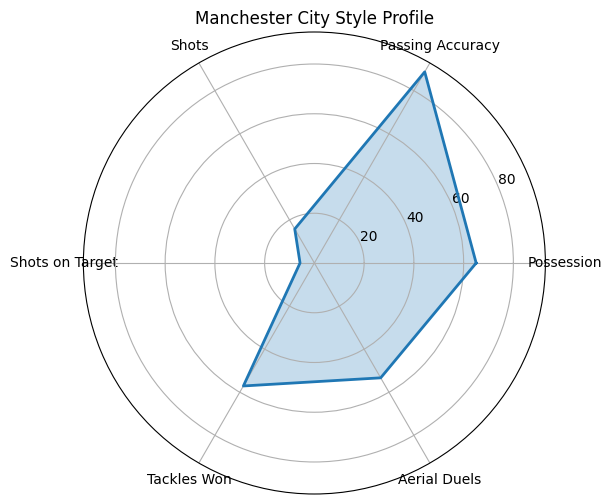

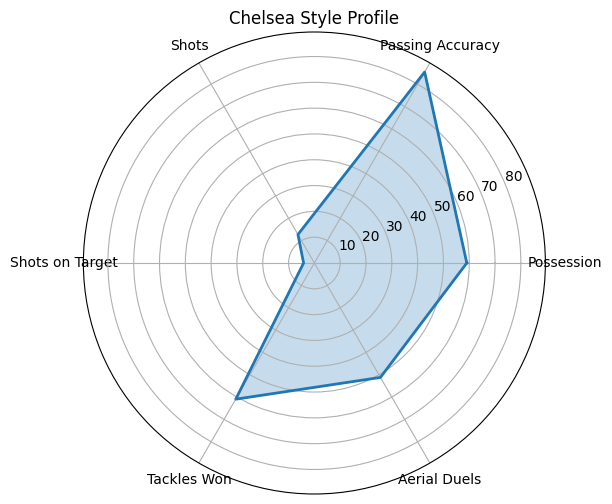

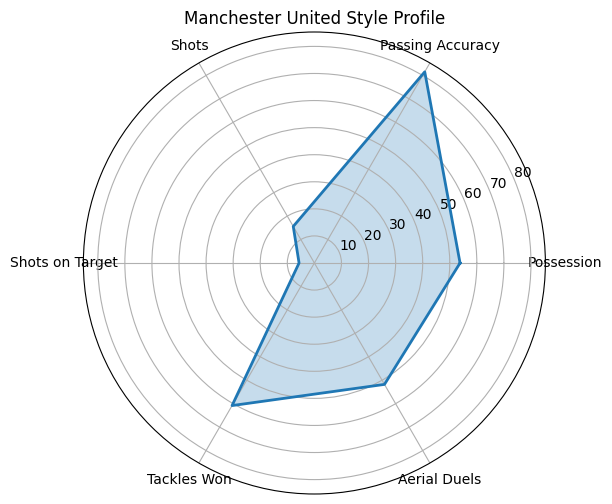

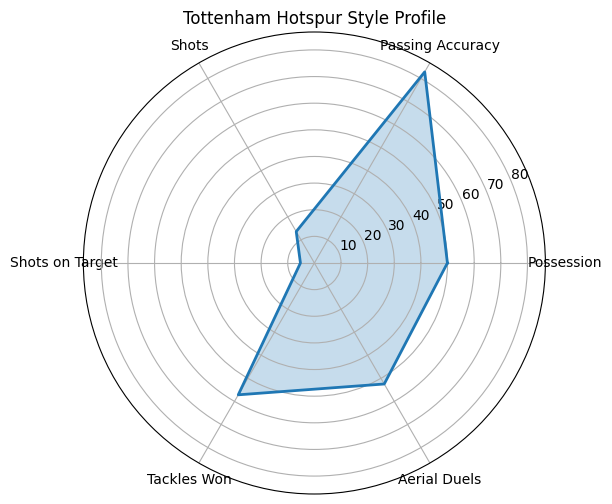

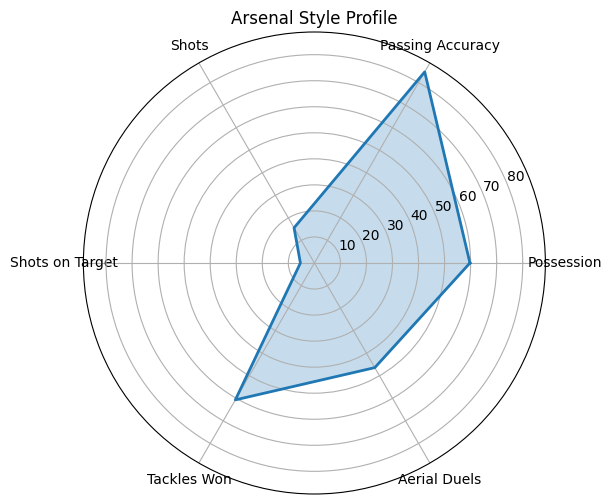

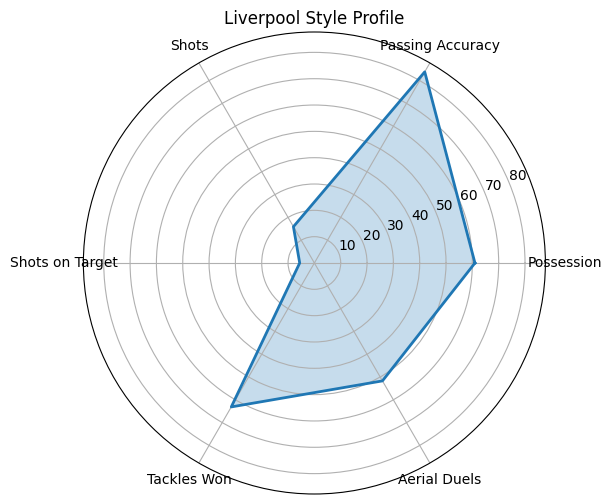

In [19]:

def radar_chart(team_name):
    team = team_stats[team_stats["Team"] == team_name].iloc[0]

    categories = ["Possession", "Passing Accuracy", "Shots", "Shots on Target", "Tackles Won", "Aerial Duels"]
    values = [team[cat] for cat in categories]

    values += values[:1]  # close the circle
    angles = np.linspace(0, 2*np.pi, len(categories), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(6,6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, linewidth=2)
    ax.fill(angles, values, alpha=0.25)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories)
    plt.title(f"{team_name} Style Profile")
    plt.show()

radar_chart("Manchester City")
radar_chart("Chelsea")
radar_chart("Manchester United")
radar_chart("Tottenham Hotspur")
radar_chart("Arsenal")
radar_chart("Liverpool")# example


In [ ]:
Manchester City:
Dominate possession (often exceeding 65%).
High passing accuracy, showing their preference for patient build-up play.
Relatively fewer aerial duels and tackles compared to others, as they control the ball more.

Liverpool:
Slightly less possession than City but very high shot volume.
Aggressive pressing leads to higher tackles won and interceptions.
Strong chance creation through wide play and crosses.

Arsenal:
Balanced profile: high possession and passing accuracy, but also good pressing metrics.
Improving attacking efficiency with on-target shots increasing.
Defensive stability reflected in lower fouls and disciplined tackling.

Manchester United:
Less possession compared to City/Arsenal, but rely on quick transitions.
Strong aerial duels, reflecting their use of direct play and set-pieces.
More reliance on counter-attacks than sustained possession.

Chelsea:
Mixed profile with periods of high possession but lower attacking efficiency.
Passing accuracy is solid, but chance conversion lags behind.
Defensively strong with higher clearances and tackles.

Tottenham Hotspur:
Lower possession on average, preferring to soak pressure and counter.
High efficiency in shots on target despite fewer attempts.
Defensively resilient with strong tackling and aerial duels.

In [ ]:
Project Goal

The objective of this project was to analyze Premier League match data to uncover differences in the style of play among the "Big 6" clubs:
Manchester City, Manchester United, Liverpool, Arsenal, Chelsea, and Tottenham Hotspur.

Rather than simply looking at results (wins/losses), the focus was on how each team plays: possession, passing accuracy, chance creation, defensive duels, and attacking efficiency.